# 2019 Machine Learning Project
* Davis Berlind, Alex Marsh, Stella McMullen

## Implementing Elastic Net

In [2]:
#imports
import pandas as pd
import statsmodels.api as sm

%run -i fred_api_key
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.linear_model import ElasticNet, enet_path, lasso_path, Ridge
from sklearn.datasets import make_regression
from sklearn import preprocessing, linear_model
from sklearn.metrics import mean_squared_error

from itertools import cycle

In [17]:
#naming variables
constant = np.repeat(1, len(data))
X1 = data.DATE
X2 = data.exports
X3 = data.conf
X4 = data.cpi
X5 = data.ip
X6 = data.wage
X6 = data.emp
X7 = data.unemployment
X8 = data.ppi
X9 = data.retail_trade
X10 = data.exchange_rate
X11 = data.MV

X = np.asfortranarray({'constant' : constant, 'X2': X2, 'X3' : X3, 'X4' : X4, 'X5' : X5, 'X6' : X6, 'X7' : X7, 'X8' : X8, 'X9' : X9, 'X10' : X10, 'X11' : X11})

y = data.gdp

In [8]:
from fred import Fred

# Setting data parameters
start = datetime(1990, 1, 1)
end = datetime(2019, 4, 1)

params = {'observation_start': start.strftime('%Y-%m-%d'),
          'observation_end': end.strftime('%Y-%m-%d')}

fr = Fred(api_key = key, response_type = 'df')
gdp = fr.series.observations("GDPC1", params = params)

def growthRate(series):
    return np.exp(np.diff(np.log(series))) - 1

# fitting regression
X = pd.read_csv("data.csv").drop('date', axis = 1)
y = growthRate(gdp.value)

regr = ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
                  max_iter=1000, normalize=False, positive=False, precompute=False,
                  random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
results = regr.fit(X, y)

C:\Users\Davis Berlind\Miniconda3\lib\site-packages\fred\helpers\__init__.py:36: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  frame = frame.convert_objects(convert_numeric=True)


In [4]:
#generating predictions (will want to use training and test set in the future)
y_pred = results.predict(X)

In [5]:
# calculating MSSE
mean_squared_error(y, y_pred)

3.46374107851242e-05

In [7]:
# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

Computing regularization path using the elastic net...


In [6]:
# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

NameError: name 'alphas_lasso' is not defined

<Figure size 432x288 with 0 Axes>


## Implementing Ridge Regression

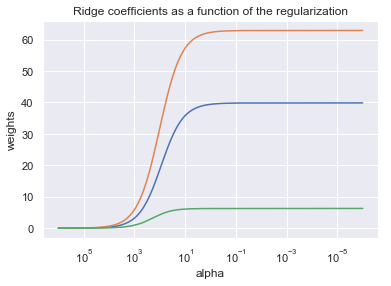

In [14]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-6, 6, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Expanding window forecasting

In [ ]:
#T = final observation number
#S = start of forecasts

for model in models:
    for i in range(0,n):
        X_train = X[0:start+i,:]
        y_train = y[0:start+i]

        model = ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
                           max_iter=1000, normalize=False, positive=False, precompute=False,
                           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
        regr.fit(X_train, y_train)
        
    
    
    